# Visualizando un proceso random walk en dos dimensiones <a class="tocSkip"></a>

Considere un mundo en dos dimensiones cuyo espacio está dividido en segmentos disjuntos y de igual tamaño

> Como una cuadricula o un tablero de ajedrez

Imaginemos ahora una entidad "borracha" que puede desplazarse en este mundo 

> En cada instante de tiempo la entidad puede quedarse donde está (0) o moverse en una de las cuatro direcciones: arriba (1), derecha (2), abajo (3), izquierda (4)
    
El movimiento es aleatorio con probabilidades `[0.4, 0.15, 0.15, 0.15, 0.15]`

Programa una clase que represente a la entidad y muestra graficamente como se mueve 
    
Para esto use `NumPy` y una [animación](https://matplotlib.org/3.2.1/api/animation_api.html) de `Matplotlib`

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Borrachin():
    
    def __init__(self, ax, grid_size=100, seed=None):
        self.movimiento = np.array([0, 1, 2, 3, 4])
        self.probs = np.array([0.4, 0.15, 0.15, 0.15, 0.15])
        # Nos aseguramos que el vector de probabilidades esté bien construido
        assert np.sum(self.probs) == 1.0, "Las probabilidades deben sumar 1"
        self.ax = ax
        self.grid_size = grid_size
        self.reset()
        # Podemos entregar la semilla aleatoria para comprobar la reproducibilidad
        if seed is not None: 
            np.random.seed(seed)
        
    def dibujar_mundo(self):
        self.ax.cla()
        self.ax.matshow(self.mundo, cmap=plt.cm.Greys)
        
    def reset(self):
        self.mundo = np.zeros(shape=(self.grid_size, 
                                     self.grid_size))
        self.posicion = np.array([self.grid_size//2, 
                                  self.grid_size//2], dtype='int')
        self.mundo[tuple(self.posicion)] = 2 # Desempaque automático su usamos tuplas
        self.dibujar_mundo()
    
    def paso(self, frame=0): # Se requiere el argumento integer para FuncAnimation
        self.mundo[tuple(self.posicion)] = 1
        direccion = np.random.choice(self.movimiento, size=1,
                                     p=self.probs)[0]
        if direccion == 1:
            self.posicion[0] -= 1
        elif direccion == 2:
            self.posicion[1] += 1
        elif direccion == 3:
            self.posicion[0] += 1
        elif direccion == 4:
            self.posicion[1] -= 1
        
        self.mundo[tuple(self.posicion)] = 2
        self.dibujar_mundo()
        return direccion
        
    

Lo siguiente es sólo valido para matplotlib con backend `notebook`

<IPython.core.display.Javascript object>


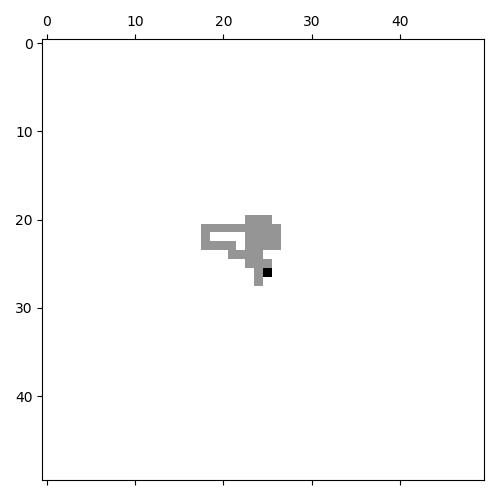

In [3]:
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)

In [4]:
pablo = Borrachin(ax, grid_size=50)

for i in range(100):
    pablo.paso()
    fig.canvas.draw() # Si no usamos draw, la figura no se actualiza
    plt.pause(0.01) # Con esto podemos controlar la velocidad de la animación

Con FuncAnimation podemos hacer animaciones de matplotlib irrespecto de su usamos jupyter o no

<IPython.core.display.Javascript object>


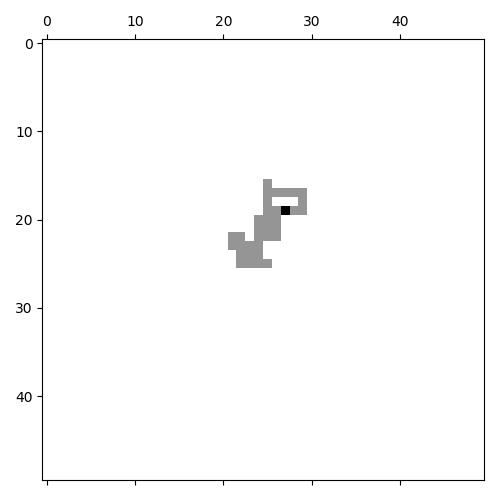

In [5]:
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
pablo = Borrachin(ax, grid_size=50)

from matplotlib.animation import FuncAnimation, writers

anim= FuncAnimation(fig, 
                    func=pablo.paso, 
                    init_func=pablo.reset, 
                    frames=100,
                    interval=100, 
                    repeat=False);

Podemos grabar la animación en un formato de nuestra preferencia

Requiere tener `imagemagick` (o `ffmpeg`) instalado en el sistema

In [6]:
anim.save('borrachito.gif', writer='imagemagick')
# anim.save('borrachito.mp4', writer='ffmpeg')

### Más sobre random walks <a class="tocSkip"></a>
- https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/home.htm